In [1]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

In [2]:
baredf1 = pd.read_csv("../data/cic/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv")

In [3]:
#baredf2 = pd.read_csv("../data/cic/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv")

In [4]:
baredf3 = pd.read_csv("../data/cic/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv")

In [5]:
#baredf5 = pd.read_csv("../data/cic/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv", low_memory=False)

In [6]:
baredf6 = pd.read_csv("../data/cic/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv")

In [7]:
baredf7 = pd.read_csv("../data/cic/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv")

In [8]:
baredf8 = pd.read_csv("../data/cic/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv")

In [9]:
#baredf9 = pd.read_csv("../data/cic/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv")

In [10]:
baredf10 = pd.read_csv("../data/cic/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv")

In [11]:
baredf = pd.concat([baredf1, baredf3, baredf6, baredf7, baredf8, baredf10])

In [12]:
baredf = baredf.drop(columns=['Timestamp'])

In [13]:
baredf.Label = baredf.apply( lambda x: 0 if x.Label == 'Benign' else 1, axis=1)
for a in baredf.columns:
    if (baredf[a].mean() == 0):
        baredf = baredf.drop(columns=[a])

In [16]:
baredf.replace([np.inf, -np.inf], np.nan)
threshold = 1e30
baredf = baredf[baredf.abs() <= threshold]

In [17]:
baredf = baredf.dropna()

In [18]:

ben = baredf[baredf['Label'] == 0]
att = baredf[baredf['Label'] != 0]

In [19]:
ben = ben.iloc[:500000, :]
ben.shape

(500000, 69)

In [20]:
att = att.iloc[:500000, :]
att.shape

(500000, 69)

In [21]:
baredf = pd.concat([att, ben])

In [19]:
for a in baredf.columns:
  print(f"geral: {baredf[a].mean()}, ataque: {att[a].mean()}, benegin: {ben[a].mean()}  {a}")

geral: 6494.036841, ataque: 5007.400796, benegin: 7980.672886  Dst Port
geral: 7.464762, ataque: 5.999578, benegin: 8.929946  Protocol
geral: 8999366.208601, ataque: 2614855.097258, benegin: 15383877.319944  Flow Duration
geral: 4.883949, ataque: 2.355682, benegin: 7.412216  Tot Fwd Pkts
geral: 5.537098, ataque: 1.769504, benegin: 9.304692  Tot Bwd Pkts
geral: 327.926931, ataque: 171.686672, benegin: 484.16719  TotLen Fwd Pkts
geral: 3876.332627, ataque: 146.276738, benegin: 7606.388516  TotLen Bwd Pkts
geral: 172.625969, ataque: 117.309632, benegin: 227.942306  Fwd Pkt Len Max
geral: 6.003736, ataque: 0.230846, benegin: 11.776626  Fwd Pkt Len Min
geral: 47.179684167178635, ataque: 38.273729732537454, benegin: 56.085638601819795  Fwd Pkt Len Mean
geral: 68.91431769274037, ataque: 65.03748354254519, benegin: 72.79115184293553  Fwd Pkt Len Std
geral: 267.84499, ataque: 82.175888, benegin: 453.514092  Bwd Pkt Len Max
geral: 13.896121, ataque: 0.001974, benegin: 27.790268  Bwd Pkt Len Min


In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
for col in baredf.columns:
    print(f'{col}: uniqs: {baredf[col].unique()} ')

Dst Port: uniqs: [ 8080     0 55063 ... 61505 12429  2189] 
Protocol: uniqs: [ 6  0 17] 
Flow Duration: uniqs: [   16079      577    10279 ... 95795706  4719221  6007251] 
Tot Fwd Pkts: uniqs: [    3     2    10    30    20    40    39    41    43    42     1    51
    34    53    32     5    12    14    33    46     8     4    13    15
    31    57    56    55    62    60     9     6    22    28    99    85
    88    95    37    36    38    45    27    52    54    19   110    98
    59    66    49    58    18    90   109    29    74    76    77    48
    67    71    68    81     7    23    21    79    92    86    50    91
    89    16    72    75    78    73    94    93    69   154   153   202
   203   204    83    11    17   131   199   198    61    25    24    47
    63    70    35    26  1271   830   152   160   133    65   276   482
   328   151   767   329   107   447   101   272  1116   173   116   128
   112    84   736   183   165   167   230   113   105   323   336   111
   1

In [22]:
for a in baredf.columns:
    if ((abs(baredf[a].mean()-ben[a].mean())) <= (baredf[a].mean()*0.3)):
        print(a)

Dst Port
Protocol
Fwd Pkt Len Mean
Fwd Pkt Len Std
Flow IAT Std
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
RST Flag Cnt
PSH Flag Cnt
ACK Flag Cnt
ECE Flag Cnt
Down/Up Ratio
Fwd Seg Size Avg
Fwd Seg Size Min
Idle Std


In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
baredf.dtypes

Dst Port               int64
Protocol               int64
Flow Duration          int64
Tot Fwd Pkts           int64
Tot Bwd Pkts           int64
TotLen Fwd Pkts        int64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max        int64
Fwd Pkt Len Min        int64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max        int64
Bwd Pkt Len Min        int64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IAT Tot          float64
Bwd IAT Mean         float64
Bwd IAT Std          float64
Bwd IAT Max          float64
Bwd IAT Min          float64
Fwd PSH Flags          int64
Fwd Header Len         int64
Bwd Header Len         int64
Fwd Pkts/s    

In [23]:
for a in baredf.columns:
    if ((abs(att[a].mean()-ben[a].mean())) <= (att[a].mean()*0.3)):
        baredf = baredf.drop(columns=[a])

In [24]:
baredf = pd.DataFrame(MaxAbsScaler().fit_transform(baredf))

In [25]:
baredf.to_csv('cicClean.csv', index=False)

In [2]:
baredf = pd.read_csv('cicClean.csv')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [4]:
baredf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.123295,0.352941,0.000134,0.000070,0.000058,0.000296,0.000001,0.190532,0.0,0.074429,...,0.000108,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.123295,0.352941,0.000005,0.000046,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.123295,0.352941,0.000086,0.000070,0.000058,0.000296,0.000001,0.190532,0.0,0.074429,...,0.000108,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.123295,0.352941,0.000004,0.000046,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.123295,0.352941,0.000086,0.000070,0.000058,0.000296,0.000001,0.190532,0.0,0.074429,...,0.000108,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
x=baredf.iloc[:,:-1]
y=baredf.iloc[:, 64]

In [10]:
treinoX, testeX, treinoY, testey = train_test_split(x, y, train_size=0.7, random_state=42)

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(treinoX, treinoY)
knnPred = knn.predict(testeX)
accuracy_score(testey, knnPred)

In [11]:
dt = DecisionTreeClassifier(min_samples_split=10)
dt.fit(treinoX, treinoY)
dtPred = dt.predict(testeX)
accuracy_score(testey, dtPred)

0.99991

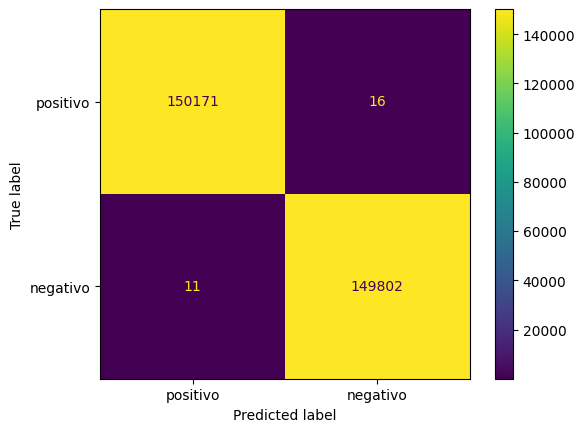

In [12]:
dtmc = confusion_matrix(testey, dtPred)
ConfusionMatrixDisplay(dtmc, display_labels=['positivo', 'negativo']).plot()

In [35]:
etc = ExtraTreesClassifier(criterion="entropy", verbose=1)
etcModel = etc.fit(treinoX, treinoY)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.5s


In [36]:
etcPred = etcModel.predict(testeX)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s


In [37]:
accuracy_score(etcPred, testey)

1.0

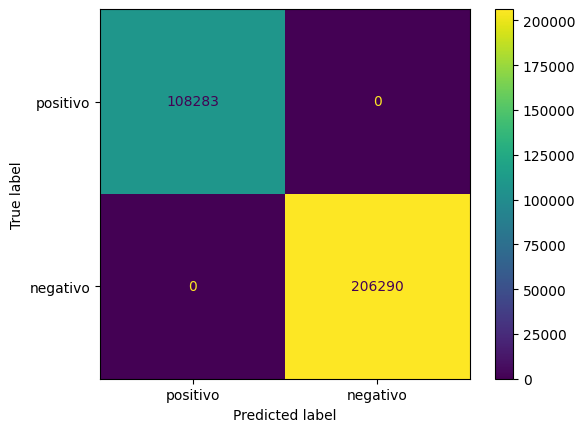

In [38]:
etcmc = confusion_matrix(testey, etcPred)
ConfusionMatrixDisplay(etcmc, display_labels=['positivo', 'negativo']).plot()